In [1]:
#Import the libraries**********************************************************

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read in the data**************************************************************

df = pd.read_csv("movies.csv")

In [2]:
#Show the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Missing data******************************************************************

print(df.isnull().sum(),'\n')
import numpy as np
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(col,' - ',pct_missing,'%')

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64 

name  -  0.0 %
rating  -  0.010041731872717789 %
genre  -  0.0 %
year  -  0.0 %
released  -  0.0002608242044861763 %
score  -  0.0003912363067292645 %
votes  -  0.0003912363067292645 %
director  -  0.0 %
writer  -  0.0003912363067292645 %
star  -  0.00013041210224308815 %
country  -  0.0003912363067292645 %
budget  -  0.2831246739697444 %
gross  -  0.02464788732394366 %
company  -  0.002217005738132499 %
runtime  -  0.0005216484089723526 %


In [4]:
#Dealing with missing Data (Deleting rows where budget is a missing data)

Newdf = df.dropna(axis=0)
print(Newdf.isnull().sum(),'\n')
NewFloatdf = df.dropna(axis=0)

import numpy as np
for col in Newdf.columns:
    pct_missing = np.mean(Newdf[col].isnull())
    print(col,' - ',pct_missing,'%')

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64 

name  -  0.0 %
rating  -  0.0 %
genre  -  0.0 %
year  -  0.0 %
released  -  0.0 %
score  -  0.0 %
votes  -  0.0 %
director  -  0.0 %
writer  -  0.0 %
star  -  0.0 %
country  -  0.0 %
budget  -  0.0 %
gross  -  0.0 %
company  -  0.0 %
runtime  -  0.0 %


In [5]:
# Data types for each column

Newdf.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Change data type

Newdf['budget'] = Newdf['budget'].astype('Int64')
Newdf['gross'] = Newdf['gross'].astype('Int64')
Newdf.dtypes

C:\Users\pc\AppData\Local\Temp/ipykernel_15924/3125837478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf['budget'] = Newdf['budget'].astype('Int64')
C:\Users\pc\AppData\Local\Temp/ipykernel_15924/3125837478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf['gross'] = Newdf['gross'].astype('Int64')


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [7]:
Newdf = Newdf.sort_values(by=['gross'], inplace=False, ascending=False)

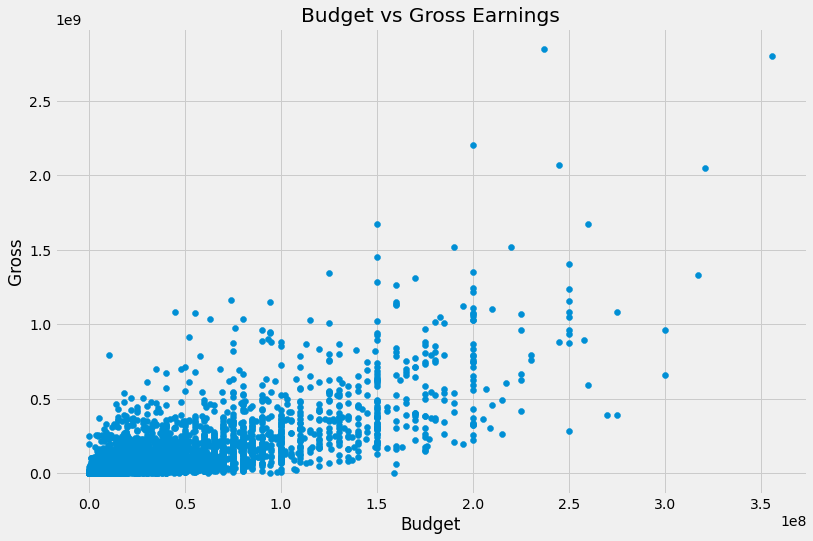

In [8]:
#Scatter plot Budget vs Gross

plt.scatter(x=Newdf['budget'], y=Newdf['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [9]:
Newdf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


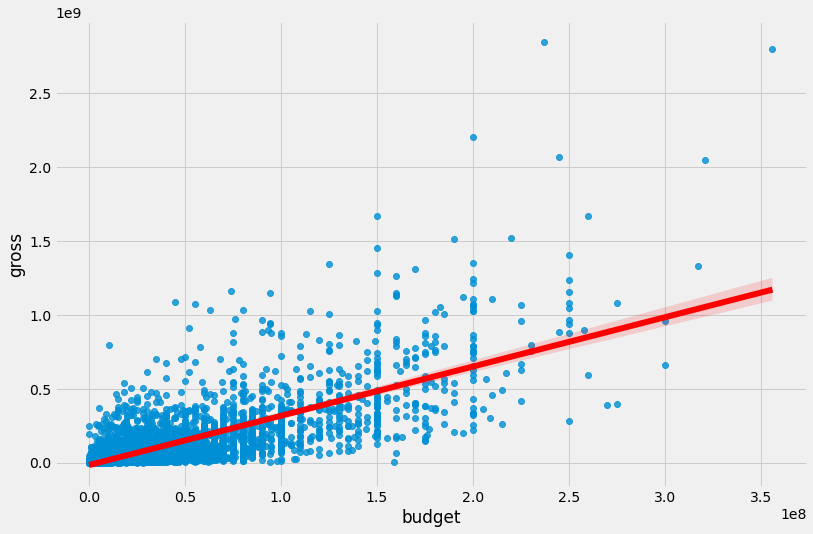

In [10]:
#Seaborn plot Budget vs Gross

sns.regplot(x='budget', y='gross', data=NewFloatdf, line_kws={"color":"red"})
plt.show()

In [11]:
#The correlation in our data

Newdf.corr()

#The highest correlation is between Gross and Budget

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


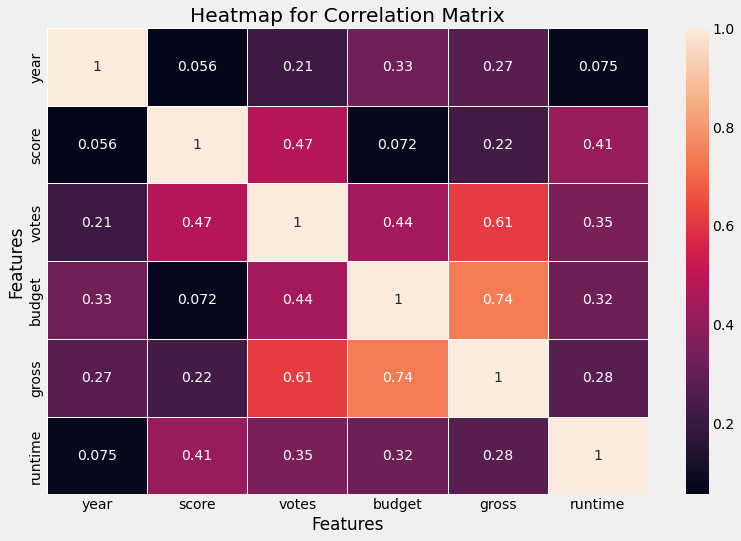

In [12]:
correlation_matrix = Newdf.corr()
sns.heatmap(correlation_matrix, annot=True, linewidth=.5)

plt.title('Heatmap for Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [13]:
NewFloatdf = NewFloatdf.sort_values(by=['gross'], inplace=False, ascending=False)
df_num = NewFloatdf
for col in df_num.columns:
    if (df_num[col].dtype == 'object'):
        df_num[col]=df_num[col].astype('category')
        df_num[col]=df_num[col].cat.codes
df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000.0,2.847246e+09,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000.0,2.797501e+09,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000.0,2.201647e+09,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000.0,2.069522e+09,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000.0,2.048360e+09,983,149.0


In [14]:
#The correlation in our data

df_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


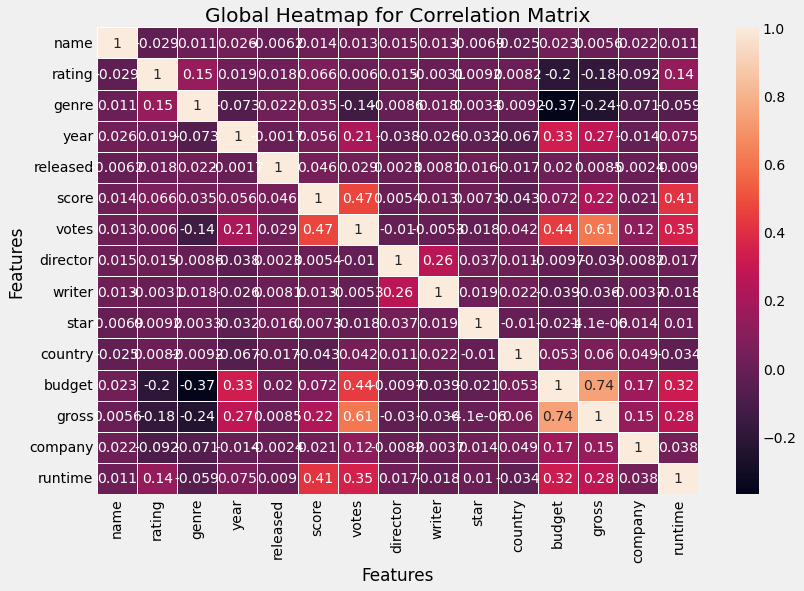

In [15]:
num_correlation_matrix = df_num.corr()
sns.heatmap(num_correlation_matrix, annot=True, linewidth=.5)

plt.title('Global Heatmap for Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [16]:
pd.set_option('display.max_rows', None)
corr_pairs = num_correlation_matrix.unstack()
Sorted = corr_pairs.sort_values(ascending=False)
Sorted

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740247
budget    gross       0.740247
votes     gross       0.614751
gross     votes       0.614751
votes     score       0.474256
score     votes       0.474256
budget    votes       0.439675
votes     budget      0.439675
runtime   score       0.414068
score     runtime     0.414068
runtime   votes       0.352303
votes     runtime     0.352303
budget    year        0.327722
year      budget      0.327722
runtime   budget      0.318695
budget    runtime     0.318695
gross     runtime     0.275796
runtime 

In [17]:
HighCorr = Sorted[(Sorted)>=0.5]
HighCorr

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740247
budget    gross       0.740247
votes     gross       0.614751
gross     votes       0.614751
dtype: float64

In [18]:
#The highest correlations existing are :
#               Between Gross and Budget
#               Between Gross and Votes